# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

### Imports

In [1]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
import statsmodels.api as sm
import copy
import matplotlib.pyplot as plt
import sklearn.metrics as skm


def encadenar(i,lista):
    nlista = copy.deepcopy(lista)
    nlista.append(i)
    return nlista
    

# Algoritmo forward, para elección de variables

In [2]:
def forward(keys, skeys, X, mseh, itera):
    itera = itera +1
    d = X.loc[:,'Y']
    ikey=0
    l = len(mseh)-1
    if(len(skeys)==0):  
        for i in keys:
            model = sm.OLS(d, X.loc[:,i])
            results = model.fit()
            results.summary()
            mse = results.mse_total
            if(mse<mseh[0][1]):
                mseh[0] = [i,mse,ikey]
            ikey = ikey +1
    else:   
        for i in keys: 
            k = encadenar(i,skeys)
            model = sm.OLS(d, X.loc[:,k])
            results = model.fit()
            results.summary()
            mse = results.mse_total
            if(mse<mseh[l][1] and mse<mseh[l-1][1]):
                
                mseh[l] = [i,mse,ikey]
            ikey = ikey +1
    
           
    skeys.append(keys.pop(mseh[l][2]))
    if(len(keys)==0):
        dkeys = []
        for j in mseh:
            if(not(j[0]=='')):
                dkeys.append(j[0])
        return dkeys
    
    mseh.append(['',100000,0])
    return forward(keys,skeys,X,mseh, itera)



# Carga de datos y ejecución de forward

In [3]:

X = pd.read_csv('./datos/diabetes.csv')
key = []
for i in X.keys():
    key.append(i)
    
ind = 0
key.pop(10)
    
dkeys = forward(key,[], X, [['',100000,0]], 0)

print("Variables elegidas: ",dkeys)

Variables elegidas:  ['age', 'bmi', 's1', 's3', 's5']


### Entrenamiento y evaluación del modelo elegido

In [4]:
dmodel = sm.OLS(X['Y'], X.loc[:,dkeys]) 
dresults = dmodel.fit()

### Eelección del mdelo de redes neuronales

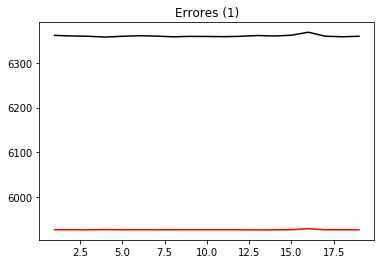

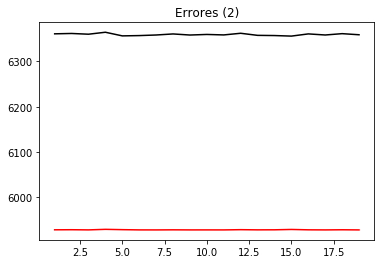

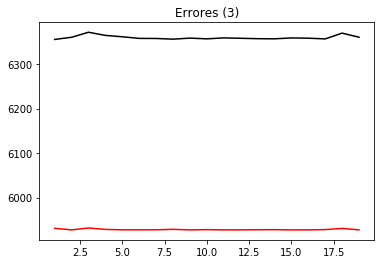

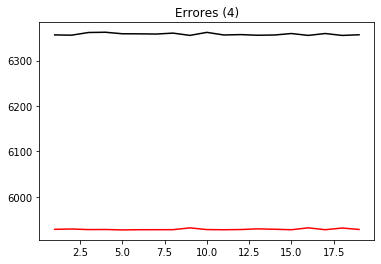

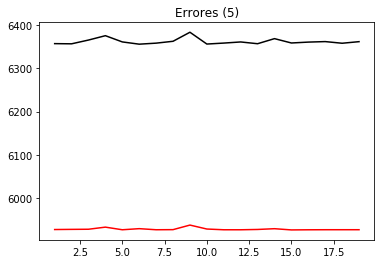

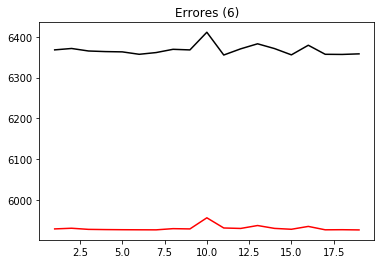

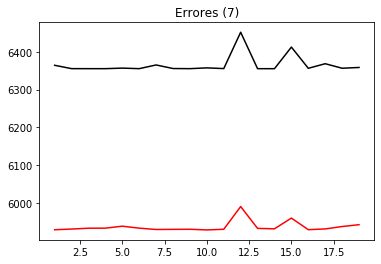

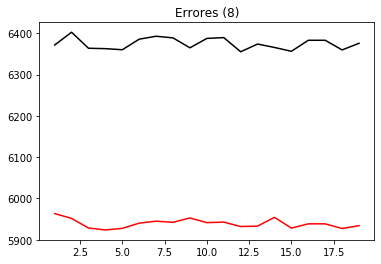

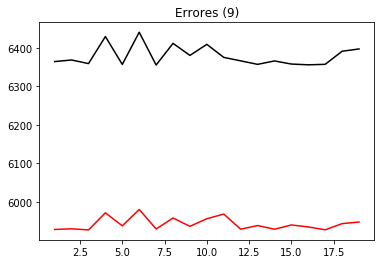

In [5]:
X_train = X.loc[:, dkeys][:380]
X_test = X.loc[:, dkeys][380:420]
X_pred = X.loc[:,dkeys][420:]
d = X['Y']
Y_train = d[:380]
Y_test = d[380:420]
Y_pred = d[420:]


for j in range(1,10):
        
    E_train_hist = []
    E_test_hist = []

    for i in range(1,20):
        m = MLPRegressor(
            hidden_layer_sizes = (i,j),  # Una capa oculta con una neurona
            activation = 'logistic',    #  {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
            solver = 'sgd',             #  {‘lbfgs’, ‘sgd’, ‘adam’}
            alpha = 0.0,                #
            learning_rate_init = 0.1,   # Valor de la tasa de aprendizaje
            learning_rate = 'constant', # La tasa no se adapta automáticamente
            verbose = False,            # Reporte del proceso de optimización
            shuffle = True,             #
            tol = 1e-8,                 #
            max_iter = 25000,           # Número máximo de iteraciones
            momentum = 0.0,             #
            nesterovs_momentum = False) 
       
        m.fit(X_train, Y_train)
        E_train_hist.append(skm.mean_squared_error(m.predict(X_train), Y_train))
        E_test_hist.append(skm.mean_squared_error(m.predict(X_test), Y_test))
    
    plt.figure()
    plt.title("Errores ("+str(j)+")")
    plt.plot(range(1,20) ,E_train_hist,  '-', color="red");
    plt.plot( range(1,20) ,E_test_hist, '-', color="black");
    
 

### Entrenamiento y evaluación del modelo elegido de redes neuronales

#### Se elige el modelo con 8 capas ocultas y 3 neuronas

In [6]:
    
m = MLPRegressor(
    hidden_layer_sizes = (3,8),  # ocho capas ocultas con 3 neuronas
    activation = 'logistic',    #  {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
    solver = 'sgd',             #  {‘lbfgs’, ‘sgd’, ‘adam’}
    alpha = 0.0,                #
    learning_rate_init = 0.1,   # Valor de la tasa de aprendizaje
    learning_rate = 'constant', # La tasa no se adapta automáticamente
    verbose = False,            # Reporte del proceso de optimización
    shuffle = True,             #
    tol = 1e-8,                 #
    max_iter = 25000,           # Número máximo de iteraciones
    momentum = 0.0,             #
    nesterovs_momentum = False) 
m.fit(X_train, Y_train)


MLPRegressor(activation='logistic', alpha=0.0, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(3, 8), learning_rate='constant',
             learning_rate_init=0.1, max_fun=15000, max_iter=25000,
             momentum=0.0, n_iter_no_change=10, nesterovs_momentum=False,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=1e-08, validation_fraction=0.1, verbose=False,
             warm_start=False)